In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


C:\Users\Sahil\AppData\Local\Temp\ipykernel_19400\4275146838.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SalePrice'], shade=True)


<Axes: xlabel='SalePrice', ylabel='Density'>

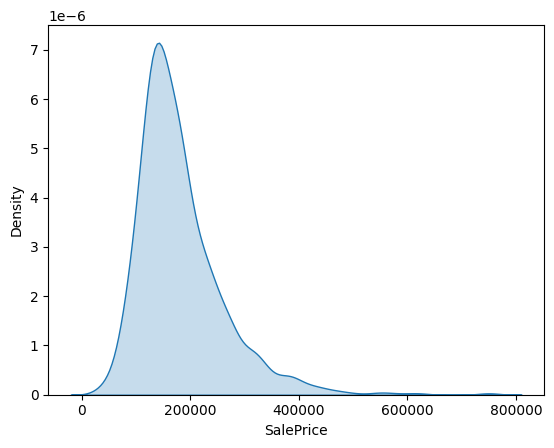

In [12]:
sns.kdeplot(df['SalePrice'], shade=True)

In [13]:
df['SalePrice'].kurt()

np.float64(6.536281860064529)

In [14]:
df['SalePrice'].skew()

np.float64(1.8828757597682129)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

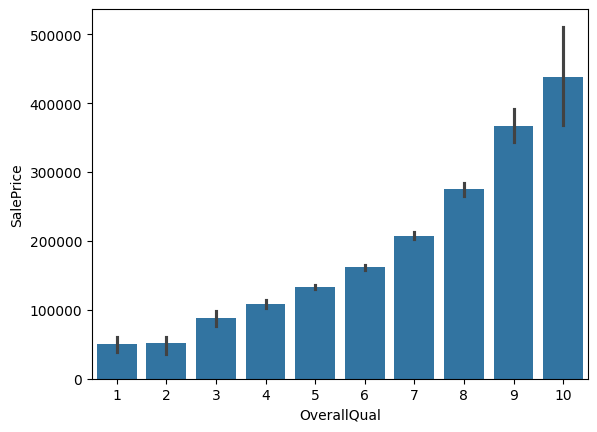

In [17]:
sns.barplot(x = 'OverallQual', y = 'SalePrice', data = df)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

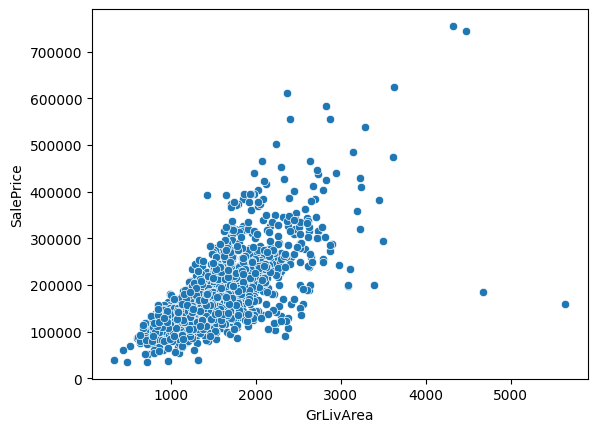

In [24]:
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = df)

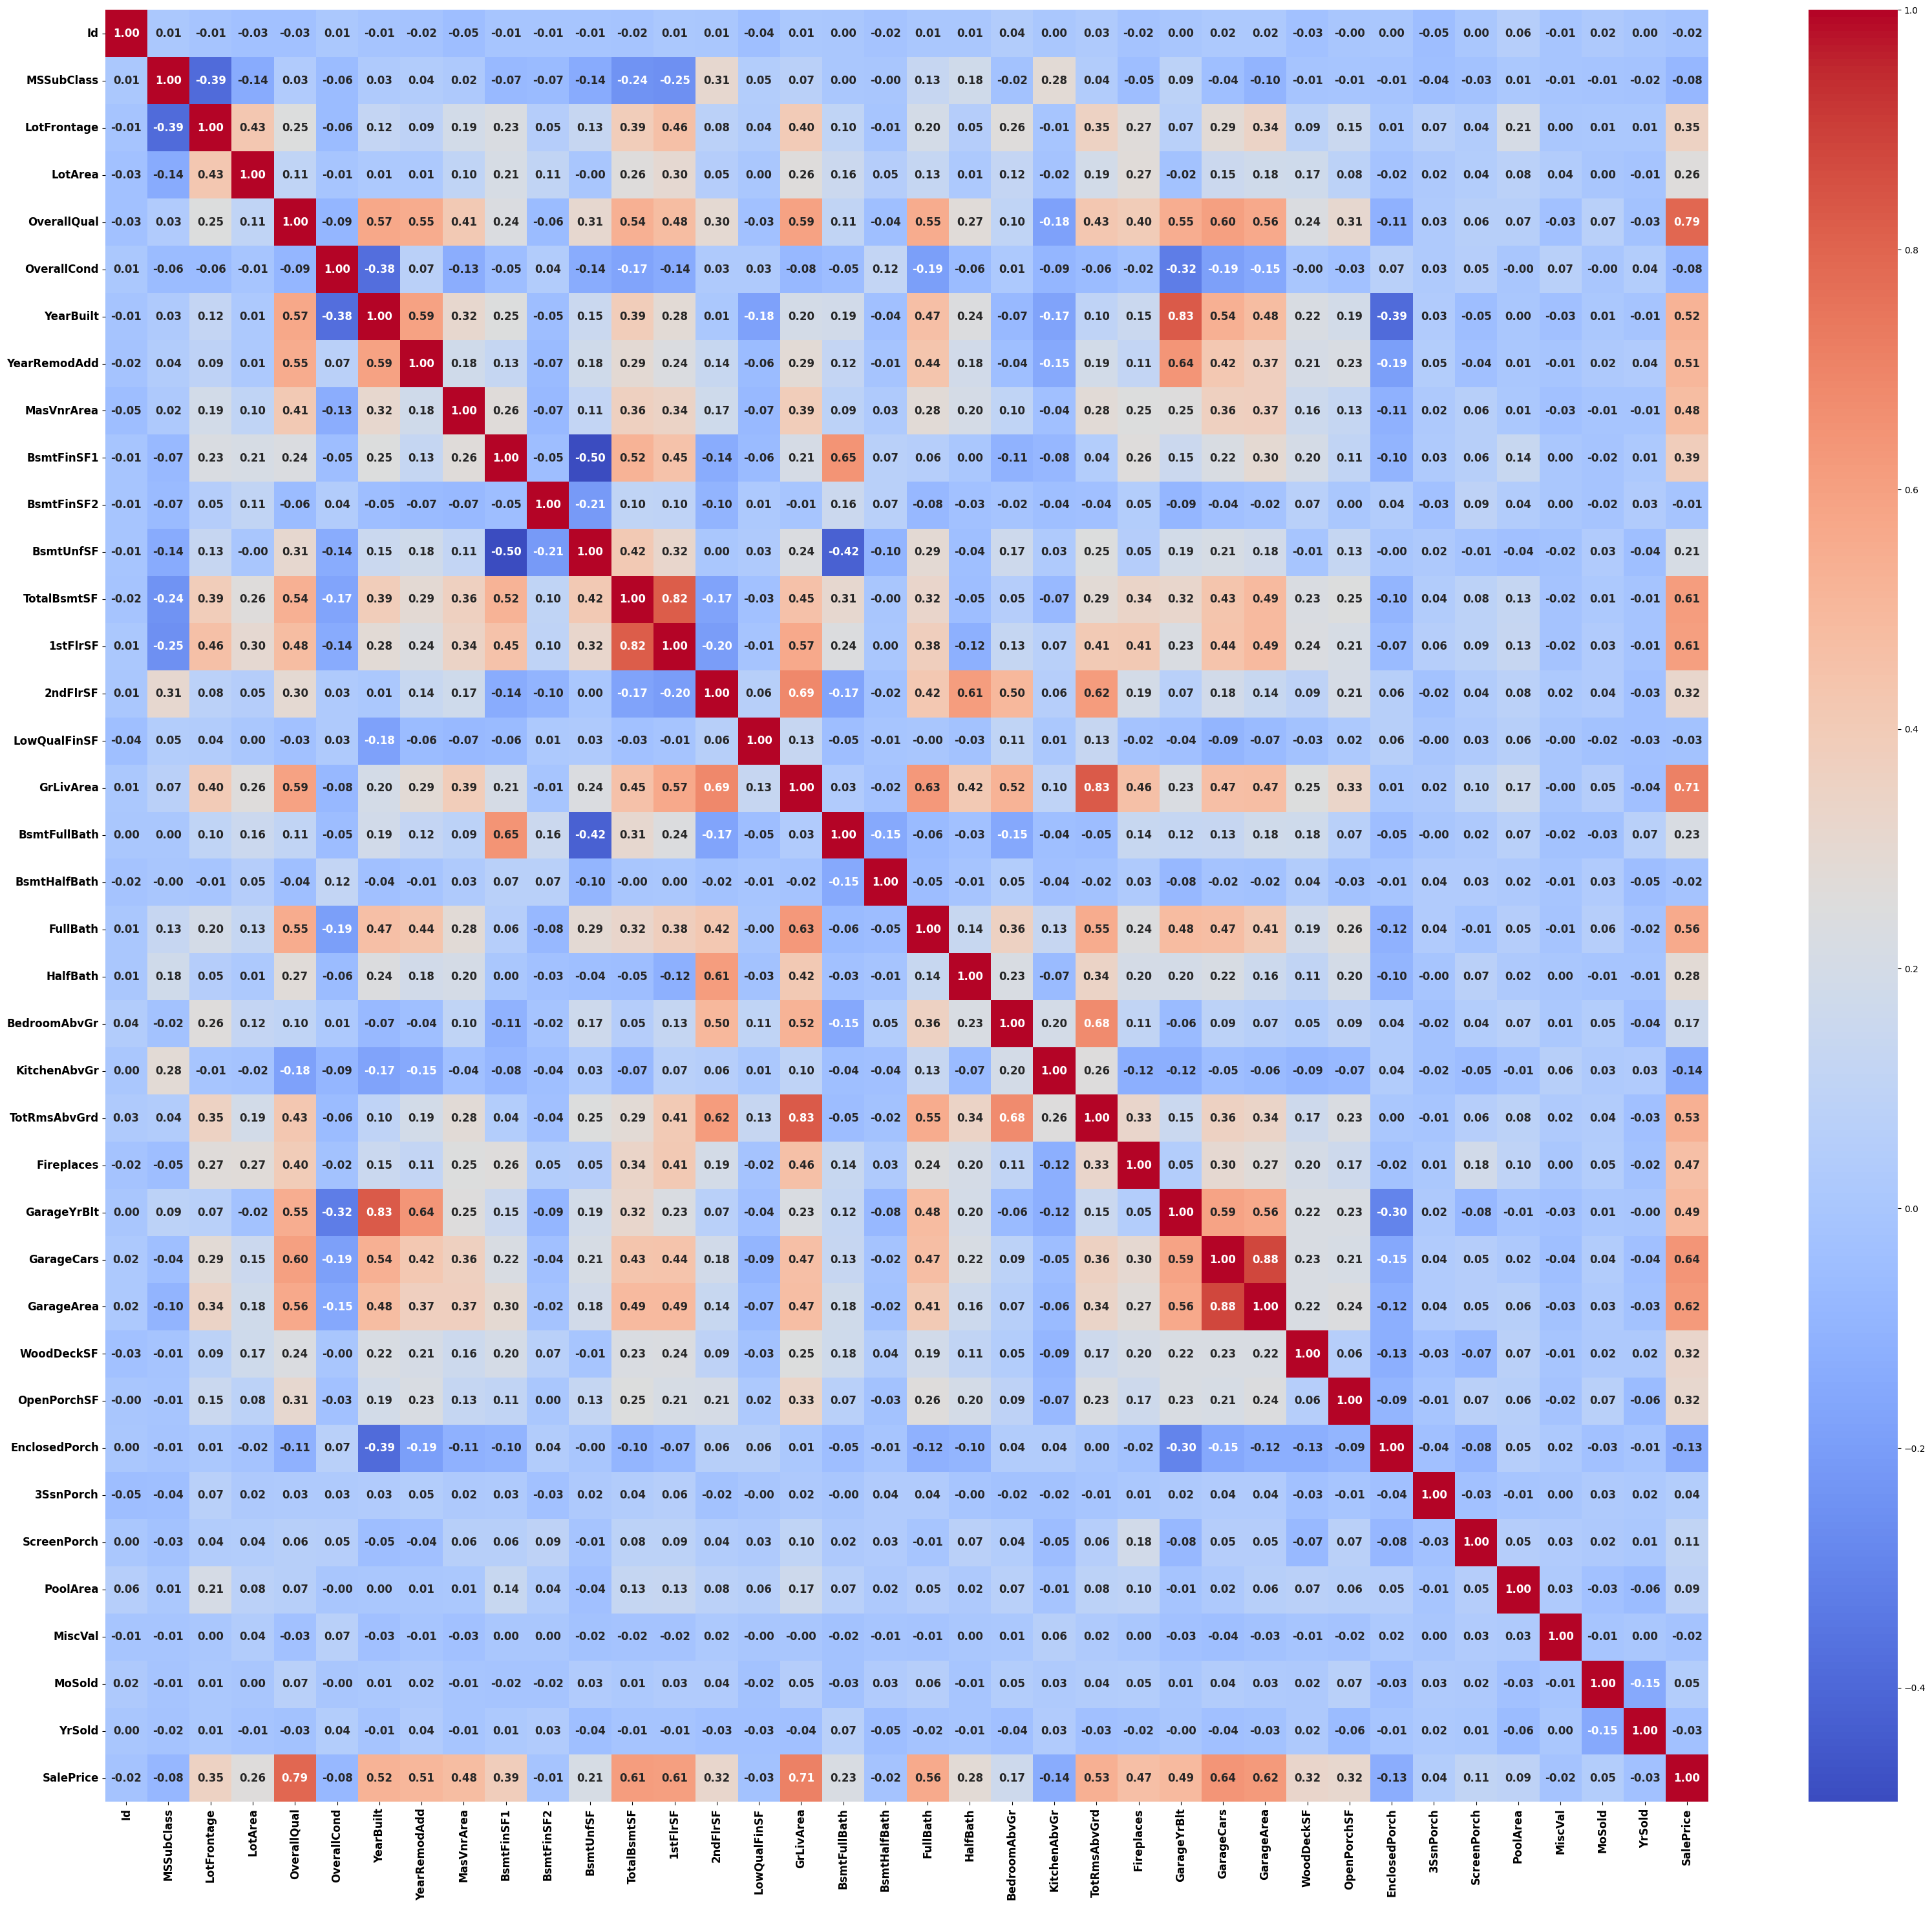

In [54]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(40, 36))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12, "weight": "bold"})
plt.xticks(rotation=90, fontsize = 12, fontweight = 'bold')
plt.yticks(rotation=0, fontsize = 12, fontweight = 'bold')
plt.show()

# Observation

1. Sale price has long right tail suggesting it is right skewed.
2. Skewness is 1.88 and kurtosis is 6.88 suggesting that the distribution is Lepto Kurtic and right-skewed confirmed by point #1 suggesting there might be outliers. Since this is not a propery bell shaped curve or a normal distribution it's violating the assumption of Linear regression. We may need to use transformation techniques to make it more normal. 
3. The bar plot shows as the quality or the OverallQual increases, so does the sale price, suggesting it might be positively correlated. OverallQual shows a strong monotonic, approximately linear trend with SalePrice, making it an excellent predictor for linear models.
4. The scatter plot of GrLivArea and sale price shows that as the area increases so does the sale price, however there are few data points where it doesn't happen which may suggest presence of outliers. There are a few high-leverage outliers with large GrLivArea but relatively low SalePrice. These points can disproportionately influence the regression line and inflate error.
5. There's a high correlation of 0.83 between GarageYrBlt and YearBuilt --> Suggests multicollinearity 
6. High correlation of 0.79 between SalePrice and OverallQual, which suggests increase in quality increase the sale price
7. High correlation of 0.71 between SalePrice and GriLivArea, which suggests increase in area increase the sale price.
8. High correlation of 0.88 GarageCars and GarageArea, suggests multicollinearity, one feature might be sufficient to predict sale price.
9. High correlation of 0.83 betwen TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) and GriLivArea. High multicollinearity can destabalise coefficient estimates in linear regression. 
